In [1]:
import dataretrieval.nwis as nwis
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import cartopy.crs as ccrs
import cartopy
import numpy as np

In [2]:
def drop_nan_var(ds,var):
    if ds[var].isnull().all():
        ds = ds.drop_vars(var)
    return ds

def var_to_float(ds,var):
    if var.startswith('p'):
        ds[var] = ds[var].to_series().apply(lambda x: pd.to_numeric(x, errors='coerce')).to_xarray()
    return ds

In [3]:
main = main = "C:\\Users\\andfa\\OneDrive\\Documents\\2024 Spring\\tidal_rivers\\"

# Station: OR1

In [4]:
or1_df = pd.read_excel(main+"OR1_WQ\\or1.xlsx",skiprows=965)

In [5]:
or1_df = or1_df.drop(0)

In [6]:
or1_df.sample_dt = pd.to_datetime(or1_df.sample_dt)

In [7]:
or1 = xr.Dataset.from_dataframe(or1_df)

In [8]:
for var in or1.data_vars:
    or1 = var_to_float(or1, var)
    or1 = drop_nan_var(or1, var)

In [9]:
or1 = or1.set_coords('sample_dt')
or1 = or1.swap_dims({'index':'sample_dt'})
or1 = or1.drop_vars('index')

In [10]:
or1

<xarray.Dataset>
Dimensions:                     (sample_dt: 567)
Coordinates:
  * sample_dt                   (sample_dt) datetime64[ns] 1990-11-20 ... 202...
Data variables: (12/88)
    agency_cd                   (sample_dt) object 'USGS' 'USGS' ... 'USGS'
    site_no                     (sample_dt) object 14246900 ... 14246900
    sample_tm                   (sample_dt) object 11:35:00 ... 12:50:00
    sample_end_dt               (sample_dt) datetime64[ns] NaT NaT ... NaT NaT
    sample_end_tm               (sample_dt) object nan nan nan ... nan nan nan
    sample_start_time_datum_cd  (sample_dt) object 'PST' 'PST' ... 'PST' 'PST'
    ...                          ...
    p70300                      (sample_dt) float64 93.0 79.0 81.0 ... nan nan
    p90095                      (sample_dt) float64 146.0 142.0 ... nan nan
    p80154                      (sample_dt) float64 12.0 13.0 35.0 ... nan nan
    p62854                      (sample_dt) float64 nan nan nan ... nan nan nan
    p50624                      (sample_dt) float64 nan nan nan ... nan nan nan
    p39086                      (sample_dt) float64 51.0 51.0 53.0 ... 48.0 nan

In [11]:
or1.sample_dt.attrs['Name'] = 'Date'
or1.sample_dt.attrs['Units'] = ''

or1.p00010.attrs['Name'] = 'Water Temperature'
or1.p00010.attrs['Units'] = '(deg C)'

or1.p00020.attrs['Name'] = 'Air Temperature'
or1.p00020.attrs['Units'] = '(deg C)'

or1.p00061.attrs['Name'] = 'Discharge, Instantaneous'
or1.p00061.attrs['Units'] = '(ft3/s)'

or1.p00065.attrs['Name'] = 'Gage Height'
or1.p00065.attrs['Units'] = '(ft)'

or1.p00076.attrs['Name'] = 'Turbidity'
or1.p00076.attrs['Units'] = ''

or1.p00095.attrs['Name'] = 'Specific Conductance'
or1.p00095.attrs['Units'] = '(microsiemens/cm @25C)'

or1.p00300.attrs['Name'] = 'Dissolved Oxygen'
or1.p00300.attrs['Units'] = '(mg/L)'

or1.p00301.attrs['Name'] = 'Dissolved Oxygen'
or1.p00301.attrs['Units'] = '(% saturation)'

or1.p00400.attrs['Name'] = 'pH (Field Measured)'
or1.p00400.attrs['Units'] = ''

or1.p00403.attrs['Name'] = 'pH (Lab Measured)'
or1.p00403.attrs['Units'] = ''

or1.p00405.attrs['Name'] = 'Carbon Dioxide'
or1.p00405.attrs['Units'] = '(mg/L)'

or1.p00600.attrs['Name'] = 'Total Nitrogen, Unfiltered'
or1.p00600.attrs['Units'] = '(mg/L)'

or1.p00602.attrs['Name'] = 'Total Nitrogen, Filtered'
or1.p00602.attrs['Units'] = '(mg/L)'

or1.p00631.attrs['Name'] = 'Nitrate + Nitrite'
or1.p00631.attrs['Units'] = '(mg/L as N)'

or1.p00665.attrs['Name'] = 'Phosphorous, Unfiltered'
or1.p00665.attrs['Units'] = '(mg/L as P)'

or1.p00666.attrs['Name'] = 'Phosphorous, Filtered'
or1.p00666.attrs['Units'] = '(mg/L as P)'

or1.p00915.attrs['Name'] = 'Calcium'
or1.p00915.attrs['Units'] = '(mg/L)'

or1.p00930.attrs['Name'] = 'Sodium'
or1.p00930.attrs['Units'] = '(mg/L)'

or1.p00945.attrs['Name'] = 'Sulfate'
or1.p00945.attrs['Units'] = '(mg/L)'

In [12]:
or1

<xarray.Dataset>
Dimensions:                     (sample_dt: 567)
Coordinates:
  * sample_dt                   (sample_dt) datetime64[ns] 1990-11-20 ... 202...
Data variables: (12/88)
    agency_cd                   (sample_dt) object 'USGS' 'USGS' ... 'USGS'
    site_no                     (sample_dt) object 14246900 ... 14246900
    sample_tm                   (sample_dt) object 11:35:00 ... 12:50:00
    sample_end_dt               (sample_dt) datetime64[ns] NaT NaT ... NaT NaT
    sample_end_tm               (sample_dt) object nan nan nan ... nan nan nan
    sample_start_time_datum_cd  (sample_dt) object 'PST' 'PST' ... 'PST' 'PST'
    ...                          ...
    p70300                      (sample_dt) float64 93.0 79.0 81.0 ... nan nan
    p90095                      (sample_dt) float64 146.0 142.0 ... nan nan
    p80154                      (sample_dt) float64 12.0 13.0 35.0 ... nan nan
    p62854                      (sample_dt) float64 nan nan nan ... nan nan nan
    p50624                      (sample_dt) float64 nan nan nan ... nan nan nan
    p39086                      (sample_dt) float64 51.0 51.0 53.0 ... 48.0 nan

In [13]:
#or1=or1.drop_vars(('sample_tm','sample_end_tm'))
#or1.to_netcdf(main+"OR1_WQ\\or1.nc")

(0.0, 100.0)

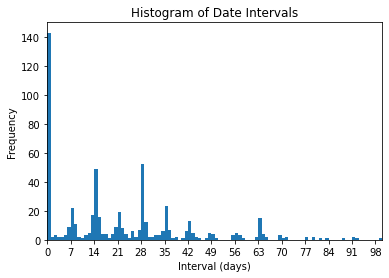

In [14]:
dates = or1['sample_dt'].values
intervals = np.diff(dates) / np.timedelta64(1, 'D')

bin_edges = np.arange(start=intervals.min(), stop=intervals.max() + 1, step=1)

plt.hist(intervals, bins=bin_edges)
plt.xlabel('Interval (days)')
plt.ylabel('Frequency')
plt.title('Histogram of Date Intervals')
plt.xticks(ticks=np.arange(0,140,7),labels=np.arange(0,140,7))
plt.xlim(0,100)

In [15]:
var01 = 'p00010'
var02 = 'p00020'
var03 = 'p00061'
var04 = 'p00065'
var05 = 'p00076'
var06 = 'p00095'
var07 = 'p00300'
var08 = 'p00301'
var09 = 'p00400'
var10 = 'p00403'
var11 = 'p00405'
var12 = 'p00600'
var13 = 'p00602'
var14 = 'p00631'
var15 = 'p00665'
var16 = 'p00666'
var17 = 'p00915'
var18 = 'p00930'
var19 = 'p00945'

var_list = [var01,var02,var03,var04,var05,var06,var07,var08,var09,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19]

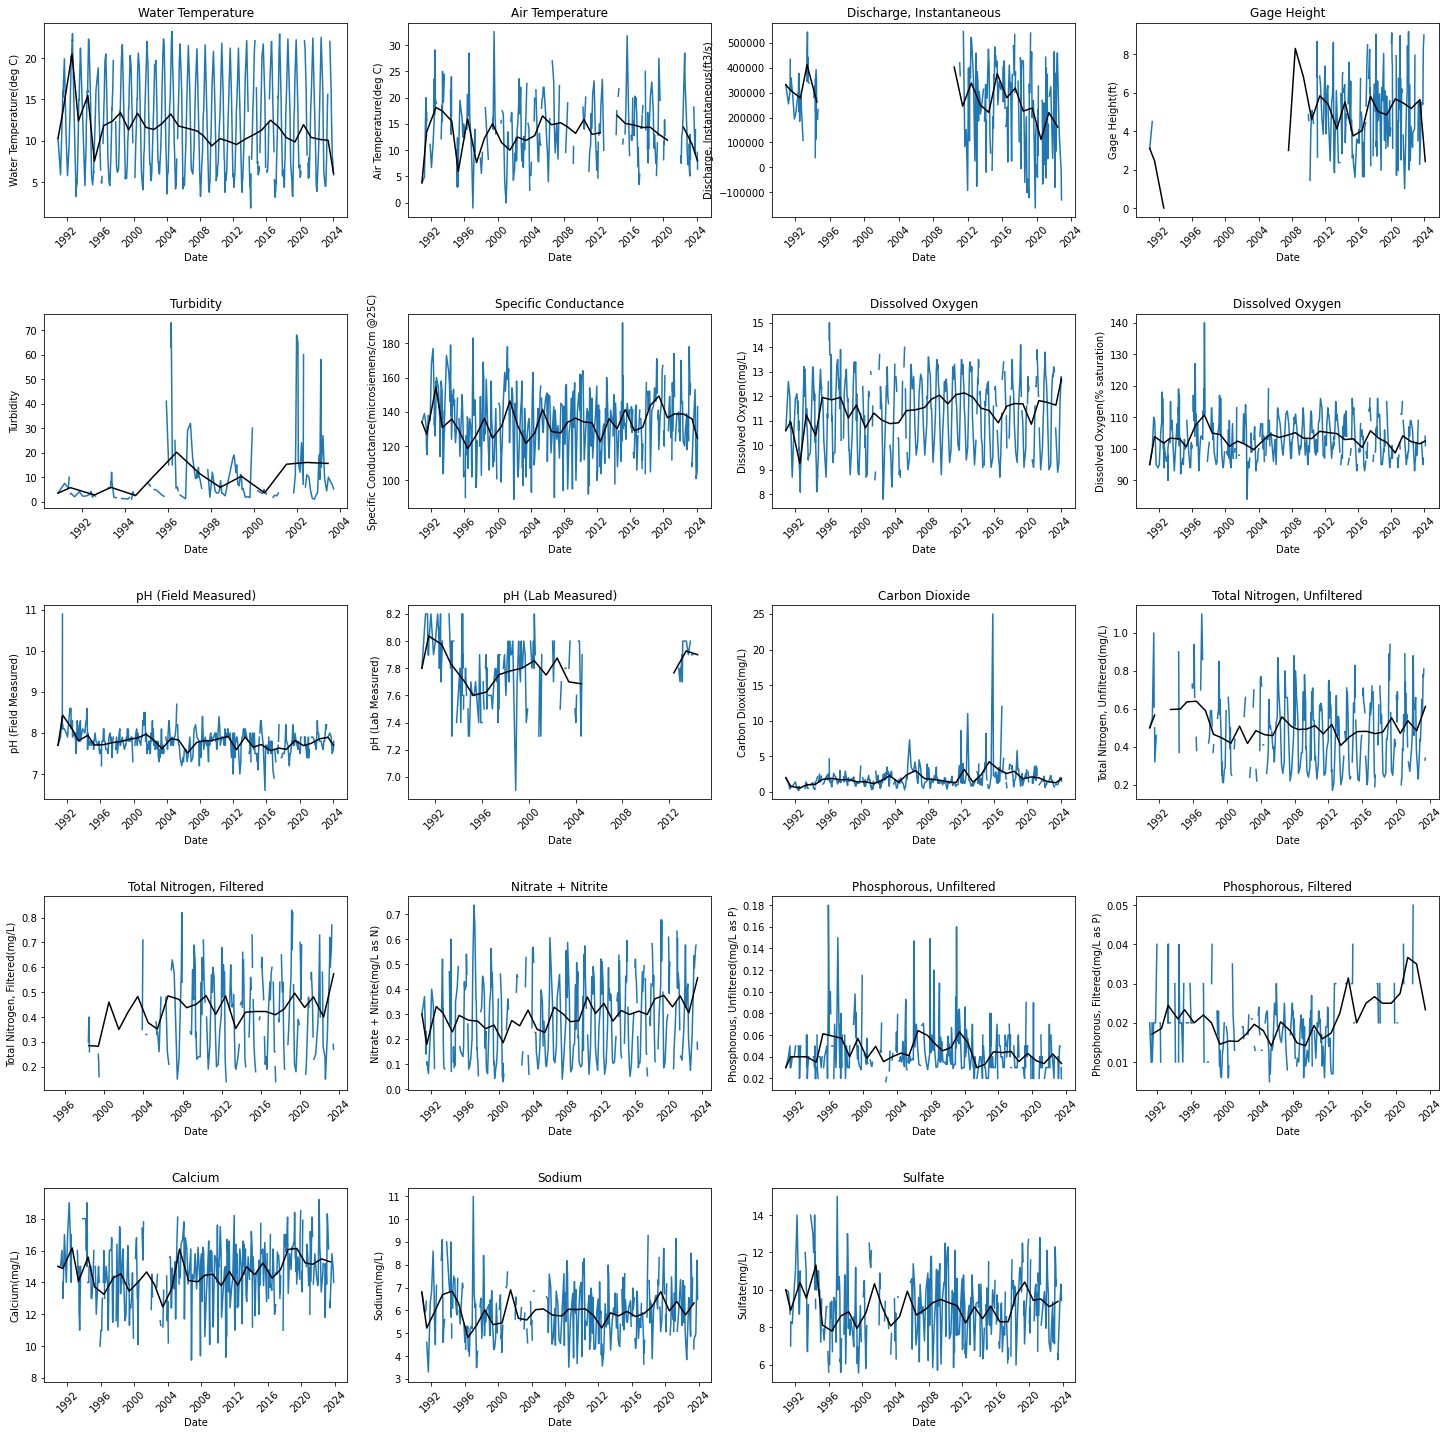

In [16]:
plt.figure(figsize=(25,25))

for n in range(1,20):
    plt.subplot(5,4,n)
    plt.plot(or1.sample_dt, or1[var_list[n-1]])
    plt.plot(or1.sample_dt.resample(sample_dt='Y').mean(), or1[var_list[n-1]].resample(sample_dt='Y').mean(),color='k')
    plt.xlabel(or1.sample_dt.attrs['Name'])
    plt.ylabel(or1[var_list[n-1]].attrs['Name'] + or1[var_list[n-1]].attrs['Units'])
    plt.xticks(rotation=45)
    plt.title(or1[var_list[n-1]].attrs['Name'])
    
plt.subplots_adjust(hspace=0.5)

# Station: TX2 686

In [17]:
tx2_df = pd.read_excel(main+"TX2_WQ\\tx2.xlsx",skiprows=686)

In [18]:
tx2_df = tx2_df.drop(0)
tx2_df.sample_dt = pd.to_datetime(tx2_df.sample_dt)
tx2 = xr.Dataset.from_dataframe(tx2_df)

In [19]:
for var in tx2.data_vars:
    tx2 = var_to_float(tx2, var)
    tx2 = drop_nan_var(tx2, var)

In [20]:
tx2 = tx2.set_coords('sample_dt')
tx2 = tx2.swap_dims({'index':'sample_dt'})
tx2 = tx2.drop_vars('index')

In [21]:
tx2.sample_dt.attrs['Name']  = 'Date'
tx2.sample_dt.attrs['Units'] = ''

tx2.p00010.attrs['Name']  = 'Water Temperature'
tx2.p00010.attrs['Units'] = '(deg C)'

tx2.p00061.attrs['Name']  = 'Discharge, Instantaneous'
tx2.p00061.attrs['Units'] = '(ft3/s)'

tx2.p00095.attrs['Name']  = 'Specific Conductance'
tx2.p00095.attrs['Units'] = '(microsiemens/cm @25C)'

tx2.p00191.attrs['Name']  = 'Inorganics'
tx2.p00191.attrs['Units'] = '(mg/L)'

tx2.p00300.attrs['Name']  = 'Dissolved Oxygen'
tx2.p00300.attrs['Units'] = '(mg/L)'

tx2.p00301.attrs['Name']  = 'Dissolved Oxygen'
tx2.p00301.attrs['Units'] = '(% saturation)'

tx2.p00400.attrs['Name']  = 'pH (Field Measured)'
tx2.p00400.attrs['Units'] = ''

tx2.p00403.attrs['Name']  = 'pH (Lab Measured)'
tx2.p00403.attrs['Units'] = ''

tx2.p00602.attrs['Name']  = 'Total Nitrogen, Filtered'
tx2.p00602.attrs['Units'] = '(mg/L)'

tx2.p00613.attrs['Name']  = 'Nitrite'
tx2.p00613.attrs['Units'] = '(mg/L as N)'

tx2.p00618.attrs['Name']  = 'Nitrate'
tx2.p00618.attrs['Units'] = '(mg/L as N)'

tx2.p00623.attrs['Name']  = 'Ammonia + Organic Nitrogen'
tx2.p00623.attrs['Units'] = '(mg/L as N)'

tx2.p00631.attrs['Name']  = 'Nitrate + Nitrite'
tx2.p00631.attrs['Units'] = '(mg/L as N)'

tx2.p00660.attrs['Name']  = 'Orthophosphate'
tx2.p00660.attrs['Units'] = '(mg/L as PO4)'

tx2.p00666.attrs['Name']  = 'Phosphorous'
tx2.p00666.attrs['Units'] = '(mg/L as P)'

tx2.p00671.attrs['Name']  = 'Orthophosphate'
tx2.p00671.attrs['Units'] = '(mg/L as P)'

tx2.p00900.attrs['Name']  = 'Hardness'
tx2.p00900.attrs['Units'] = '(mg/L as CaCO3)'

tx2.p00904.attrs['Name']  = 'Noncarbonate Hardness'
tx2.p00904.attrs['Units'] = '(mg/L as CaCO3)'

tx2.p00915.attrs['Name']  = 'Calcium'
tx2.p00915.attrs['Units'] = '(mg/L)'

tx2.p00925.attrs['Name']  = 'Magnesium'
tx2.p00925.attrs['Units'] = '(mg/L)'

tx2.p00930.attrs['Name']  = 'Sodium'
tx2.p00930.attrs['Units'] = '(mg/L)'

tx2.p00931.attrs['Name']  = 'Sodium Adsorbtion Ratio'
tx2.p00931.attrs['Units'] = ''

tx2.p00932.attrs['Name']  = 'Sodium Fraction of Cations'
tx2.p00932.attrs['Units'] = '(% in equivalents of major cations)'

tx2.p00940.attrs['Name']  = 'Cloride'
tx2.p00940.attrs['Units'] = '(mg/L)'

tx2.p00945.attrs['Name']  = 'Sulfate'
tx2.p00945.attrs['Units'] = '(mg/L)'

tx2.p00950.attrs['Name']  = 'Floride'
tx2.p00950.attrs['Units'] = '(mg/L)'

tx2.p00955.attrs['Name']  = 'Silica'
tx2.p00955.attrs['Units'] = '(mg/L as Si)2'

In [22]:
#or1=or1.drop_vars(('sample_tm','sample_end_tm'))
#or1.to_netcdf(main+"TX2_WQ\\tx2.nc")

In [23]:
var01 = 'p00010'
var02 = 'p00061'
var03 = 'p00095'
var04 = 'p00191'
var05 = 'p00300'
var06 = 'p00301'
var07 = 'p00400'
var08 = 'p00403'
var09 = 'p00602'
var10 = 'p00613'
var11 = 'p00618'
var12 = 'p00623'
var13 = 'p00631'
var14 = 'p00660'
var15 = 'p00666'
var16 = 'p00671'
var17 = 'p00900'
var18 = 'p00904'
var19 = 'p00915'
var20 = 'p00925'
var21 = 'p00930'
var22 = 'p00931'
var23 = 'p00932'
var24 = 'p00940'
var25 = 'p00945'
var26 = 'p00950'
var27 = 'p00955'

var_list = [var01,var02,var03,var04,var05,var06,var07,var08,var09,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27]

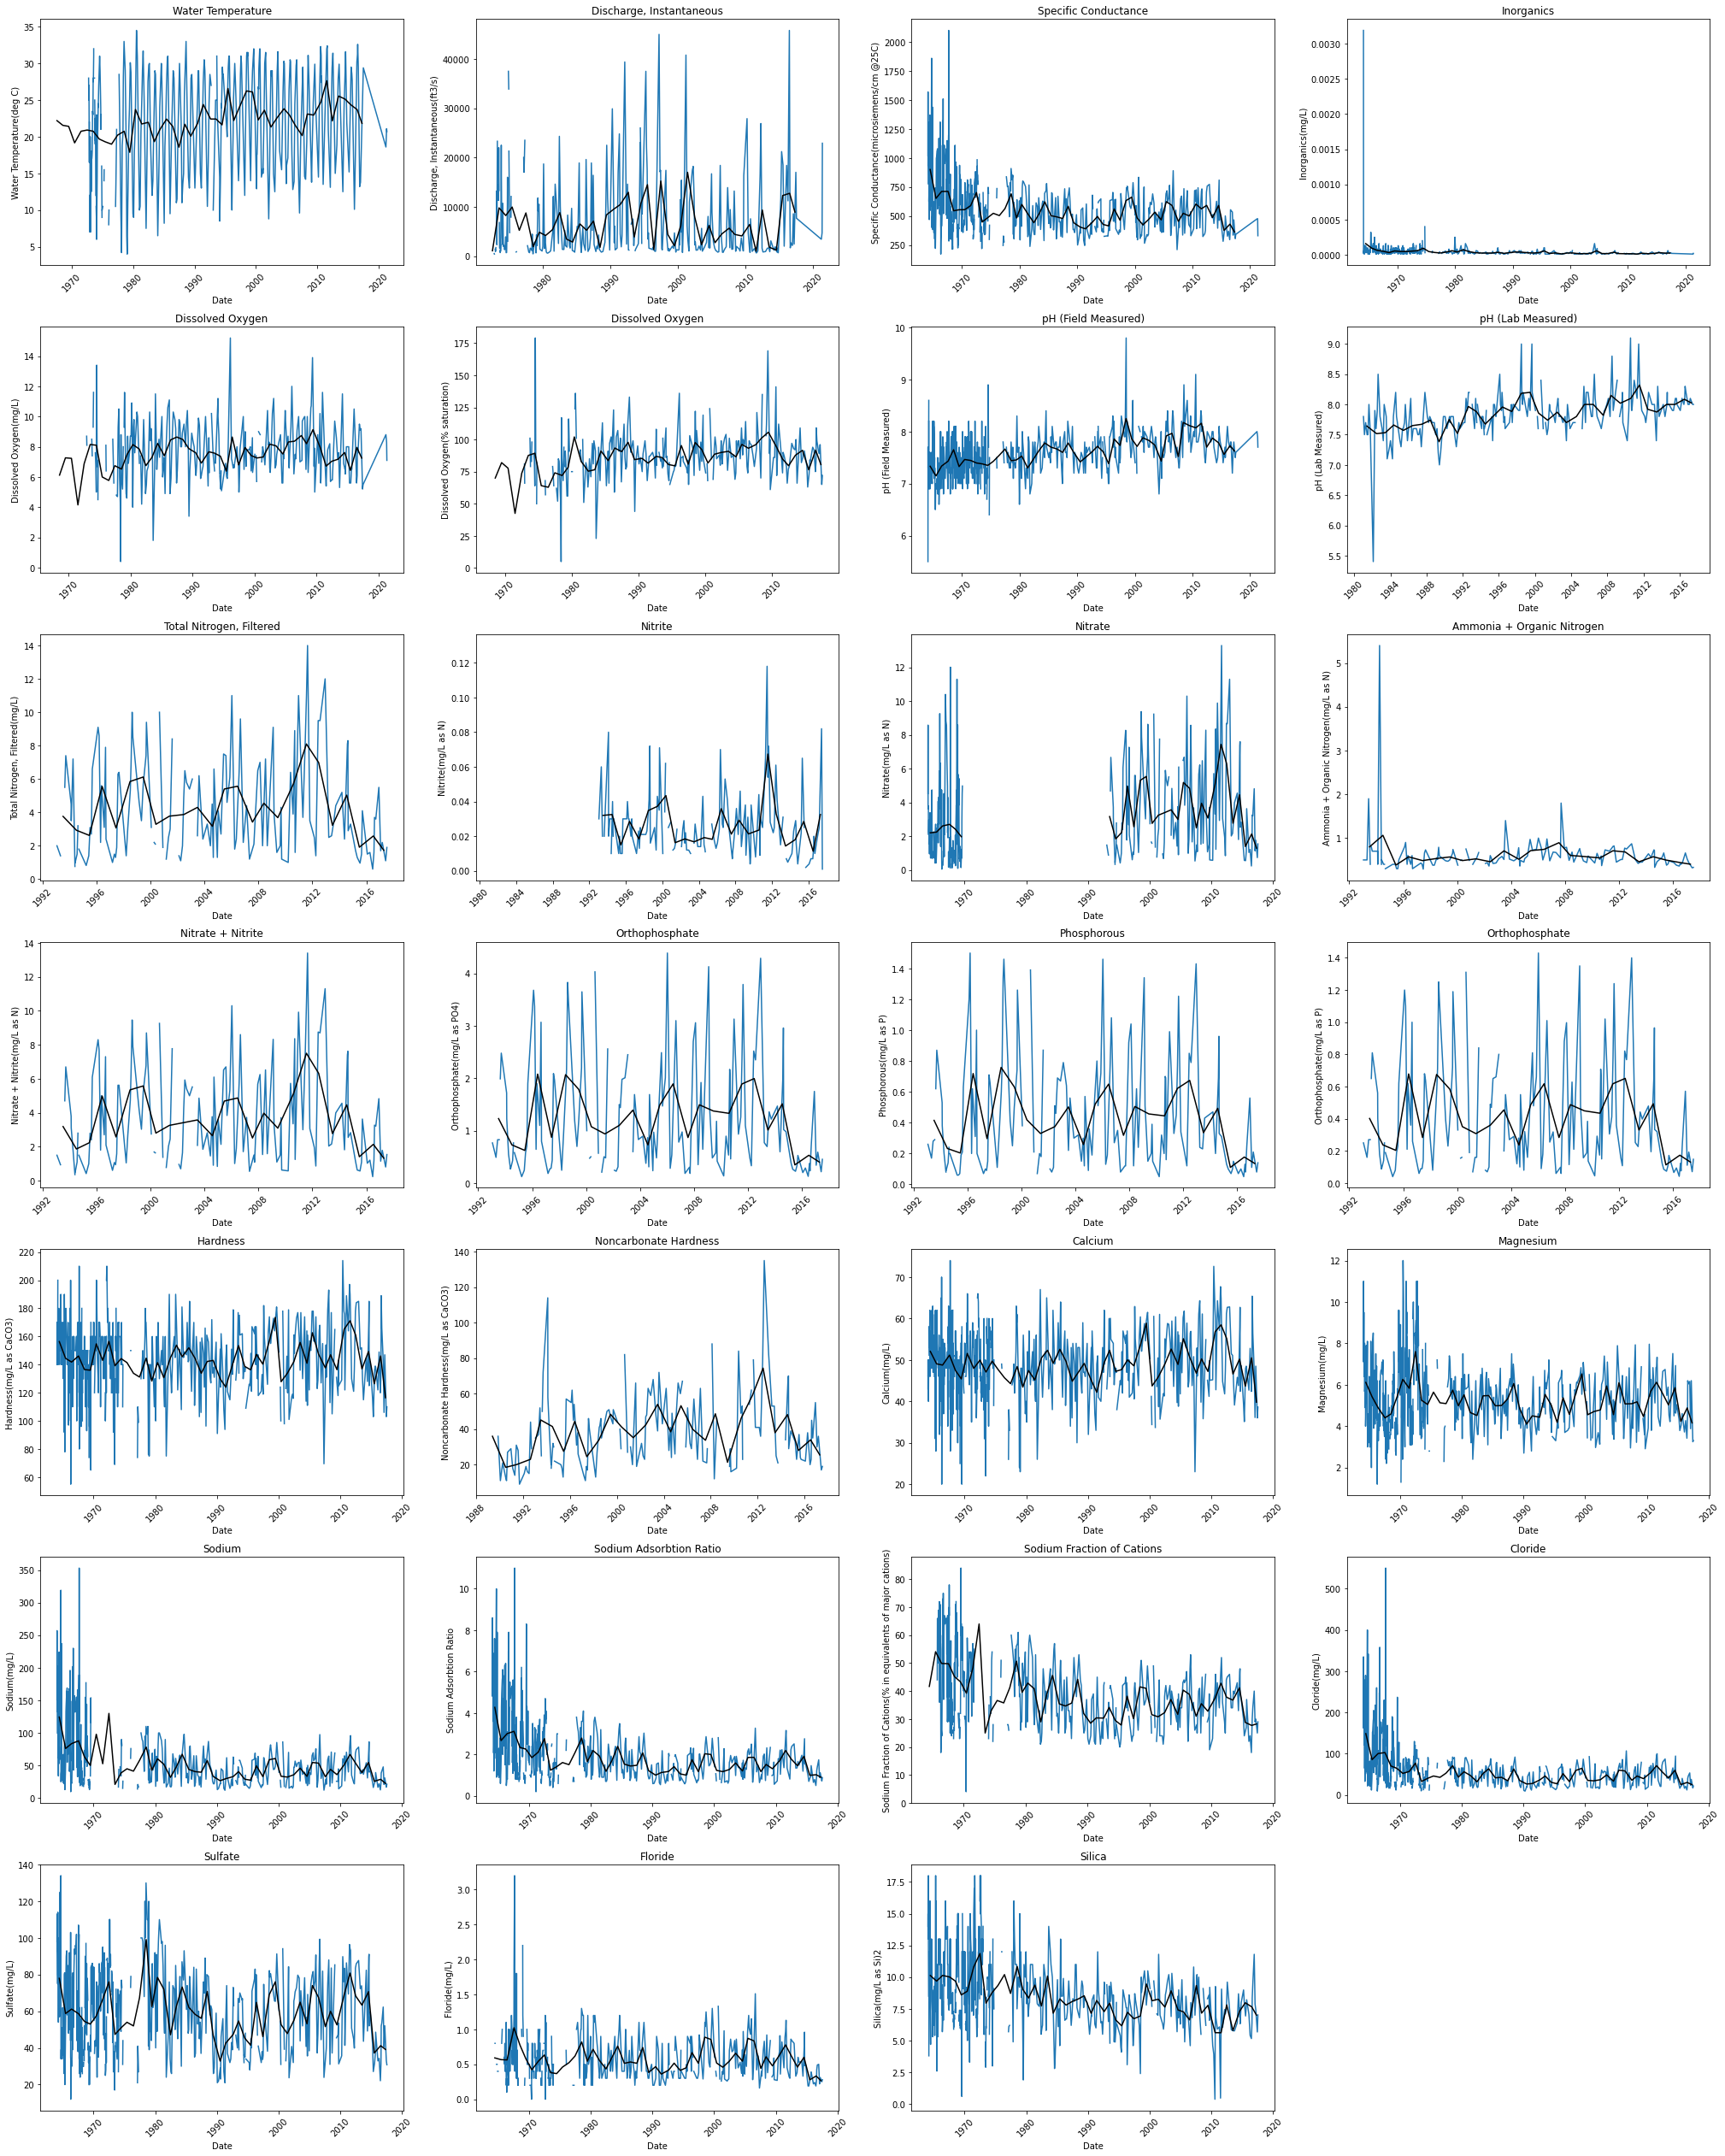

In [24]:
plt.figure(figsize=(35,45))

for n in range(1,28):
    plt.subplot(7,4,n)
    plt.plot(tx2.sample_dt, tx2[var_list[n-1]])
    plt.plot(tx2.sample_dt.resample(sample_dt='Y').mean(), tx2[var_list[n-1]].resample(sample_dt='Y').mean(),color='k')
    plt.xlabel(tx2.sample_dt.attrs['Name'])
    plt.ylabel(tx2[var_list[n-1]].attrs['Name'] + tx2[var_list[n-1]].attrs['Units'])
    plt.xticks(rotation=45)
    plt.title(tx2[var_list[n-1]].attrs['Name'])

plt.subplots_adjust(hspace=0.25)

# Station: PA4

In [29]:
pa4_df = pd.read_excel(main+"PA4_WQ\\pa4.xlsx",skiprows=1445)

In [30]:
pa4_df = pa4_df.drop(0)
pa4_df.sample_dt = pd.to_datetime(pa4_df.sample_dt)
pa4 = xr.Dataset.from_dataframe(pa4_df)

In [31]:
for var in pa4.data_vars:
    pa4 = var_to_float(pa4, var)
    pa4 = drop_nan_var(pa4, var)

In [32]:
pa4 = pa4.set_coords('sample_dt')
pa4 = pa4.swap_dims({'index':'sample_dt'})
pa4 = pa4.drop_vars('index')

In [33]:
pa4.sample_dt.attrs['Name']  = 'Date'
pa4.sample_dt.attrs['Units'] = ''

pa4.p00010.attrs['Name']  = 'Water Temperature'
pa4.p00010.attrs['Units'] = '(deg C)'

pa4.p00020.attrs['Name']  = 'Air Temperature'
pa4.p00020.attrs['Units'] = '(deg C)'

pa4.p00061.attrs['Name']  = 'Discharge, Instantaneous'
pa4.p00061.attrs['Units'] = '(ft3/s)'

pa4.p00065.attrs['Name']  = 'Gage Height'
pa4.p00065.attrs['Units'] = '(ft)'

pa4.p00095.attrs['Name']  = 'Specific Conductance'
pa4.p00095.attrs['Units'] = '(microsiemens/cm @25C)'

pa4.p00300.attrs['Name']  = 'Dissolved Oxygen'
pa4.p00300.attrs['Units'] = '(mg/L)'

pa4.p00301.attrs['Name']  = 'Dissolved Oxygen'
pa4.p00301.attrs['Units'] = '(% saturation)'

pa4.p00400.attrs['Name']  = 'pH (Field Measured)'
pa4.p00400.attrs['Units'] = ''

pa4.p00403.attrs['Name']  = 'pH (Lab Measured)'
pa4.p00403.attrs['Units'] = ''

pa4.p00600.attrs['Name']  = 'Total Nitrogen, Unfiltered'
pa4.p00600.attrs['Units'] = '(mg/L)'

pa4.p00602.attrs['Name']  = 'Total Nitrogen, Filtered'
pa4.p00602.attrs['Units'] = '(mg/L)'

pa4.p00605.attrs['Name']  = 'Organic Nitrogen, Unfiltered'
pa4.p00605.attrs['Units'] = '(mg/L as N)'

pa4.p00607.attrs['Name']  = 'Organic Nitrogen, Filtered'
pa4.p00607.attrs['Units'] = '(mg/L as N)'

pa4.p00608.attrs['Name']  = 'Ammonia, Filtered'
pa4.p00608.attrs['Units'] = '(mg/L as N)'

pa4.p00610.attrs['Name']  = 'Ammonia, Unfiltered'
pa4.p00610.attrs['Units'] = '(mg/L as N)'

pa4.p00613.attrs['Name']  = 'Nitrite'
pa4.p00613.attrs['Units'] = '(mg/L as N)'

pa4.p00618.attrs['Name']  = 'Nitrate'
pa4.p00618.attrs['Units'] = '(mg/L as N)'

pa4.p00623.attrs['Name']  = 'Ammonia + Organic Nitrogen, Filtered'
pa4.p00623.attrs['Units'] = '(mg/L as N)'

pa4.p00625.attrs['Name']  = 'Ammonia + Organic Nitrogen, Unfiltered'
pa4.p00625.attrs['Units'] = '(mg/L as N)'

pa4.p00631.attrs['Name']  = 'Nitrate + Nitrite'
pa4.p00631.attrs['Units'] = '(mg/L as N)'

pa4.p00660.attrs['Name']  = 'Orthophosphate'
pa4.p00660.attrs['Units'] = '(mg/L as PO4)'

pa4.p00665.attrs['Name']  = 'Phosphorous, Unfiltered'
pa4.p00665.attrs['Units'] = '(mg/L as P)'

pa4.p00666.attrs['Name']  = 'Phosphorous, Filtered'
pa4.p00666.attrs['Units'] = '(mg/L as P)'

pa4.p00671.attrs['Name']  = 'Orthophosphate'
pa4.p00671.attrs['Units'] = '(mg/L as P)'

pa4.p00680.attrs['Name']  = 'Organic Carbon, Unfiltered'
pa4.p00680.attrs['Units'] = '(mg/L)'

pa4.p00681.attrs['Name']  = 'Organic Carbon, Filtered'
pa4.p00681.attrs['Units'] = '(mg/L)'

pa4.p00688.attrs['Name']  = 'Inorganic Carbon, Suspended Sediment'
pa4.p00688.attrs['Units'] = '(mg/L)'

pa4.p00689.attrs['Name']  = 'Organic Carbon, Suspended Sediment'
pa4.p00689.attrs['Units'] = '(mg/L)'

pa4.p00694.attrs['Name']  = 'Total Carbon, Suspended Sediment'
pa4.p00694.attrs['Units'] = '(mg/L)'

pa4.p00900.attrs['Name']  = 'Hardness'
pa4.p00900.attrs['Units'] = '(mg/L as CaCO3)'

pa4.p00904.attrs['Name']  = 'Noncarbonate Hardness, Field'
pa4.p00904.attrs['Units'] = '(mg/L as CaCO3)'

pa4.p00905.attrs['Name']  = 'Noncarbonate Hardness, Lab'
pa4.p00905.attrs['Units'] = '(mg/L as CaCO3)'

pa4.p00915.attrs['Name']  = 'Calcium'
pa4.p00915.attrs['Units'] = '(mg/L)'

pa4.p00925.attrs['Name']  = 'Magnesium'
pa4.p00925.attrs['Units'] = '(mg/L)'

pa4.p00930.attrs['Name']  = 'Sodium'
pa4.p00930.attrs['Units'] = '(mg/L)'

pa4.p00931.attrs['Name']  = 'Sodium Adsorbtion Ratio'
pa4.p00931.attrs['Units'] = ''

pa4.p00932.attrs['Name']  = 'Sodium Fraction of Cations'
pa4.p00932.attrs['Units'] = '(% in equivalents of major cations)'

pa4.p00932.attrs['Name']  = 'Sodium Fraction of Cations'
pa4.p00932.attrs['Units'] = '(% in equivalents of major cations)'

pa4.p00935.attrs['Name']  = 'Potassium'
pa4.p00935.attrs['Units'] = '(mg/L)'

pa4.p00940.attrs['Name']  = 'Cloride'
pa4.p00940.attrs['Units'] = '(mg/L)'

pa4.p00945.attrs['Name']  = 'Sulfate'
pa4.p00945.attrs['Units'] = '(mg/L)'

pa4.p00950.attrs['Name']  = 'Floride'
pa4.p00950.attrs['Units'] = '(mg/L)'

pa4.p00955.attrs['Name']  = 'Silica'
pa4.p00955.attrs['Units'] = '(mg/L as Si)2'

In [34]:
#or1=or1.drop_vars(('sample_tm','sample_end_tm'))
#or1.to_netcdf(main+"PA4_WQ\\pa4.nc")

In [35]:
var01 = 'p00010'
var02 = 'p00061'
var03 = 'p00065'
var04 = 'p00095'
var05 = 'p00300'
var06 = 'p00301'
var07 = 'p00400'
var08 = 'p00600'
var09 = 'p00605'
var10 = 'p00613'
var11 = 'p00618'
var12 = 'p00623'
var13 = 'p00625'
var14 = 'p00631'
var15 = 'p00660'
var16 = 'p00665'
var17 = 'p00666'
var18 = 'p00671'
var19 = 'p00900'
var20 = 'p00915'
var21 = 'p00925'
var22 = 'p00930'
var23 = 'p00931'
var24 = 'p00932'
var25 = 'p00935'
var26 = 'p00940'
var27 = 'p00945'
var28 = 'p00955'

var_list = [var01,var02,var03,var04,var05,var06,var07,var08,var09,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28]

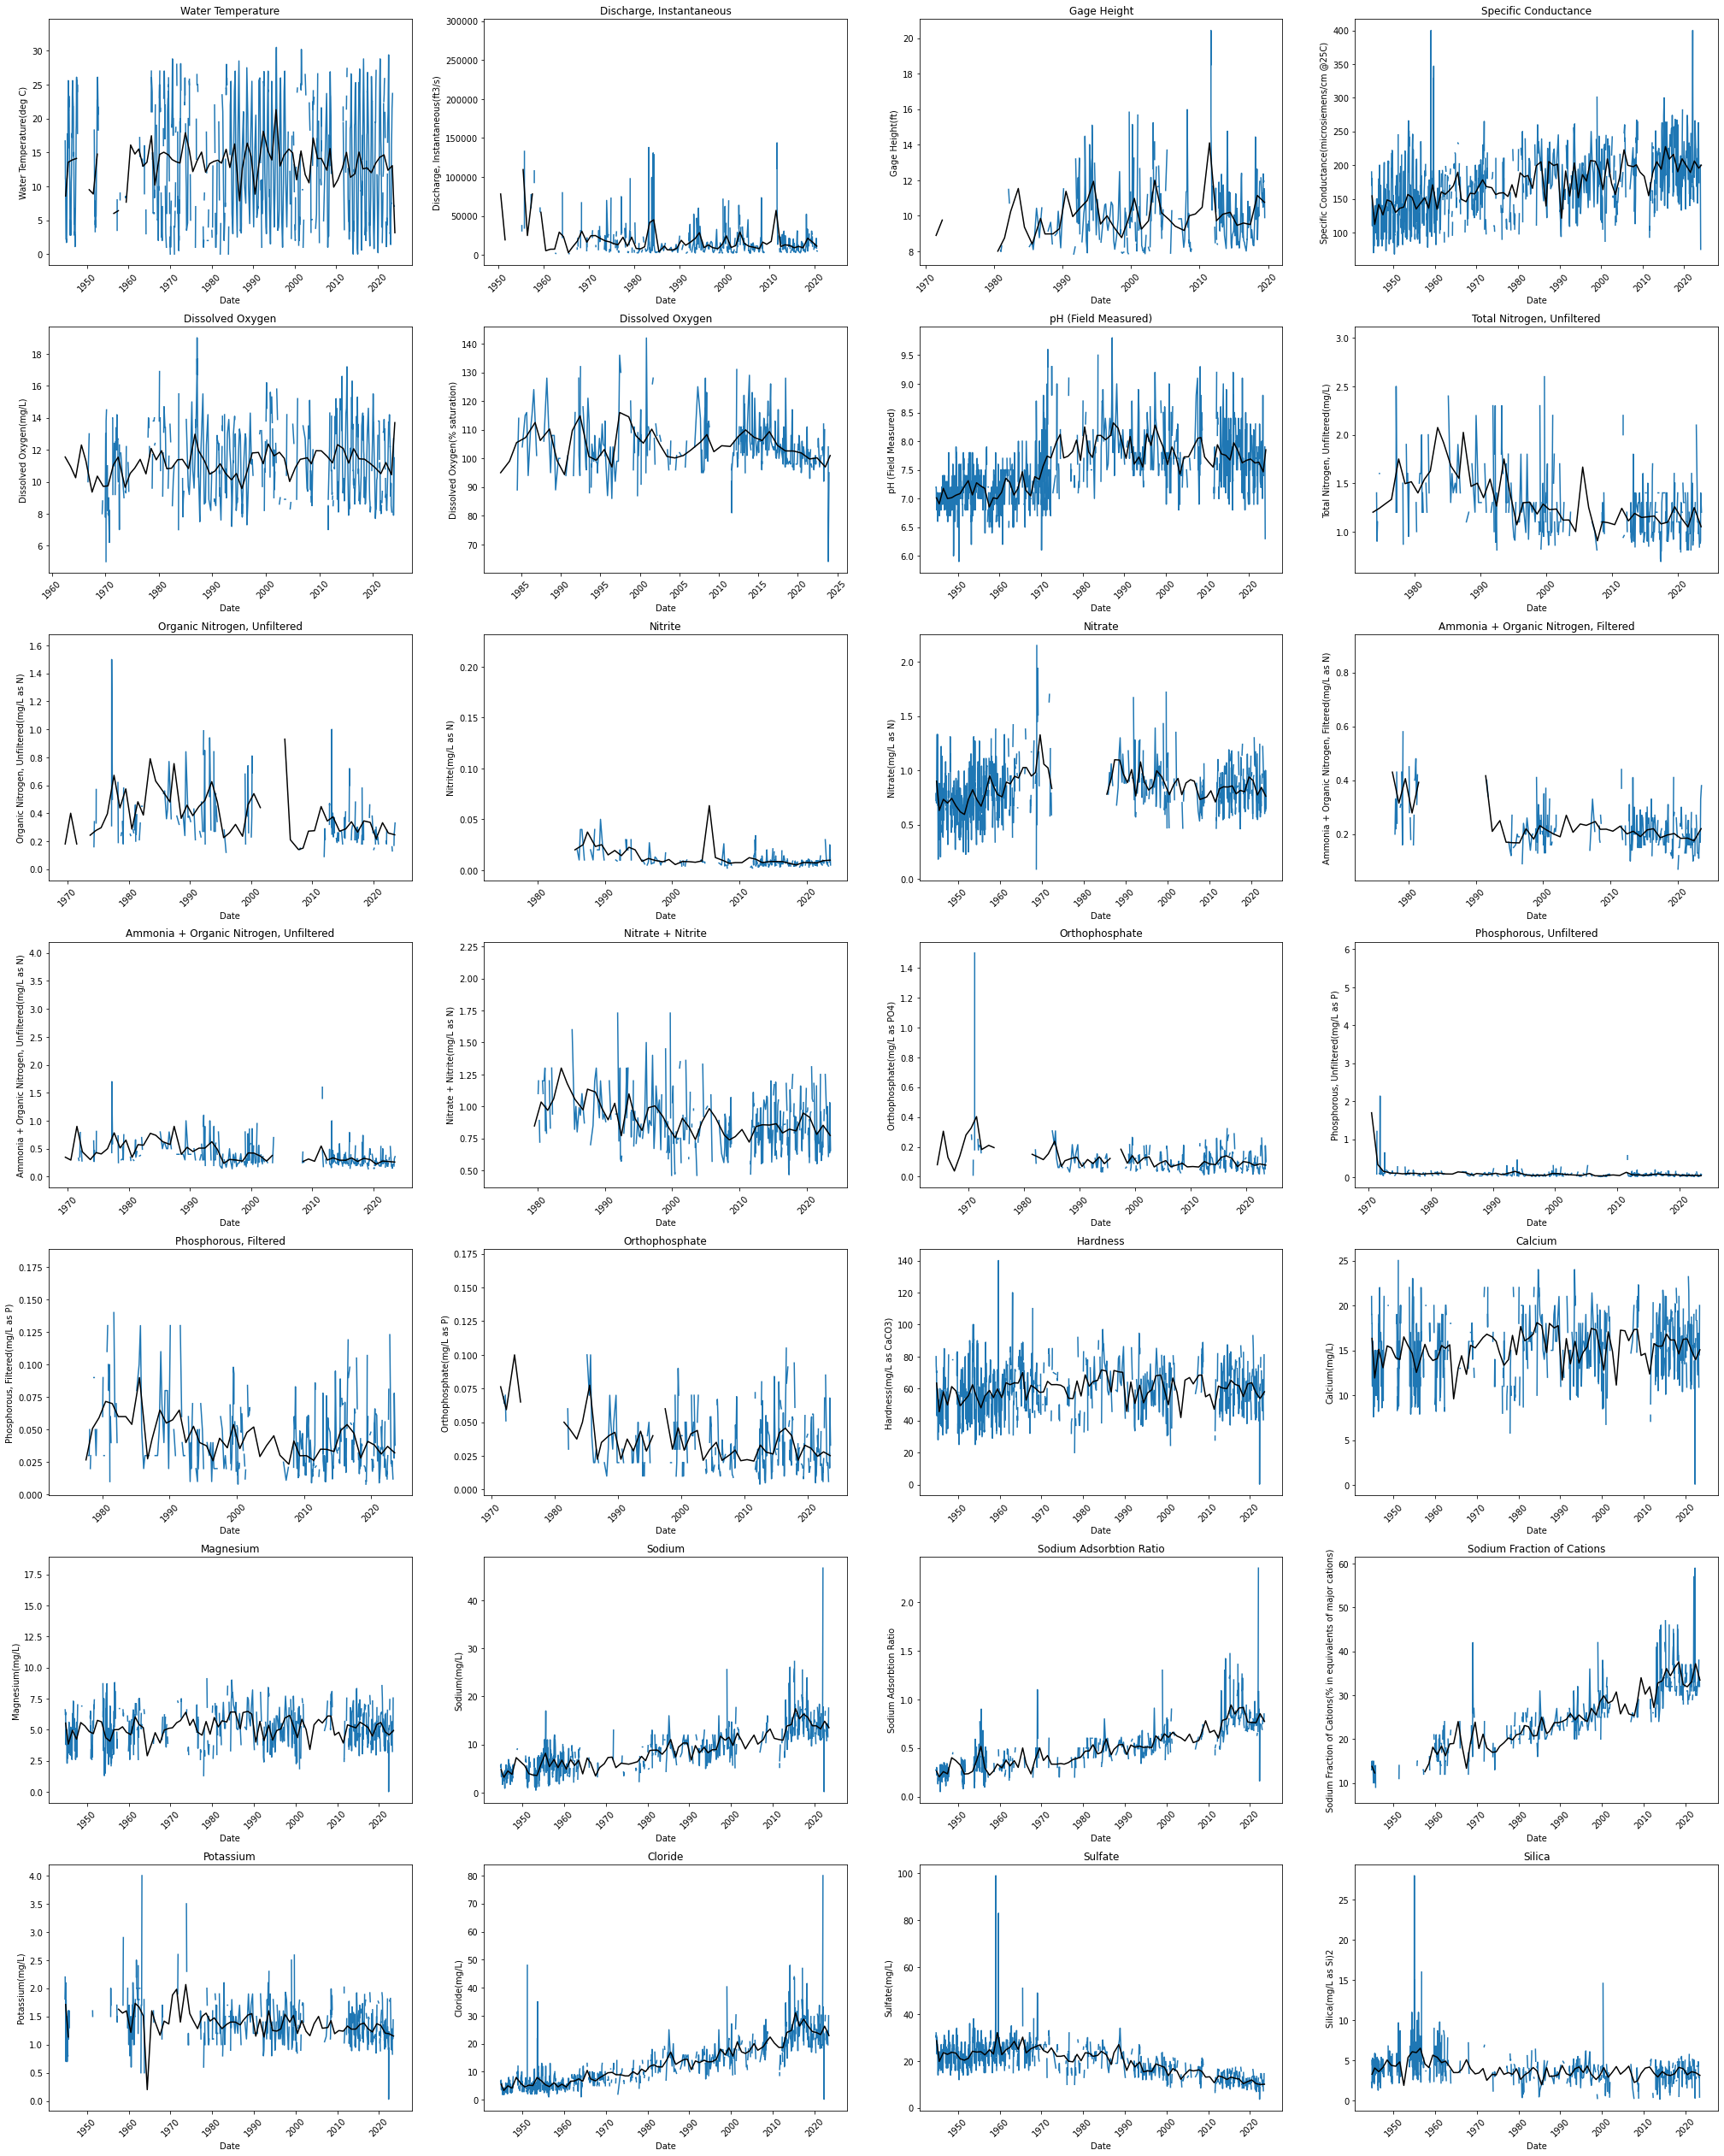

In [36]:
plt.figure(figsize=(35,45))

for n in range(1,29):
    plt.subplot(7,4,n)
    plt.plot(pa4.sample_dt, pa4[var_list[n-1]])
    plt.plot(pa4.sample_dt.resample(sample_dt='Y').mean(), pa4[var_list[n-1]].resample(sample_dt='Y').mean(),color='k')
    plt.xlabel(pa4.sample_dt.attrs['Name'])
    plt.ylabel(pa4[var_list[n-1]].attrs['Name'] + pa4[var_list[n-1]].attrs['Units'])
    plt.xticks(rotation=45)
    plt.title(pa4[var_list[n-1]].attrs['Name'])

plt.subplots_adjust(hspace=0.25)